# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


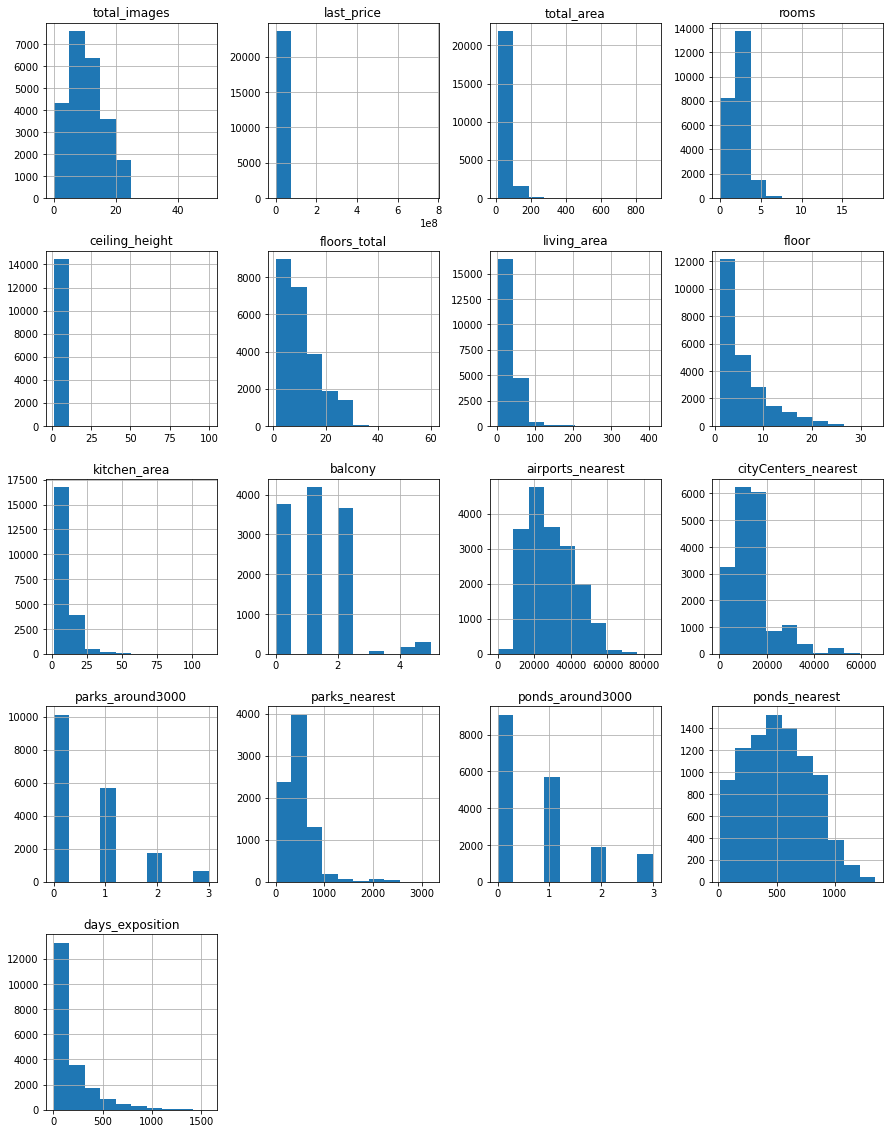

In [3]:
data.hist(figsize=(15, 20));

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В 15 из 21 столбца имеются пропуски, где-то совсем чуть-чуть, а где-то больше 50% (is_apartment, parks_nearest, ponds_nearest). Эти столбцы над будет изучить подробнее. Обратило на себя внимание, то что в столбце 'is_apartment' тип данных  object, а должен быть bool, в столбце 'first_day_exposition' так же тип данных object, а должен быть datetime64.

Смущают значения min и max в ряде столбцов (в первую очередь 'ceiling_height', 'rooms', 'living_area', 'kitchen_area').

На следующем этапе рассмотрим данные более подробно

### Выполните предобработку данных

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data['balcony']=data['balcony'].fillna(value=0)
data['is_apartment']=data['is_apartment'].fillna(value='False')

In [8]:
print(data['balcony'].isna().sum())
print(data['is_apartment'].isna().sum())

0
0


Мы сделали замену пропусков в колонке "balcony" на 0, т.к. скорее всего - если количество балконов не указано, то их нет.
Так же мы заменили пропуски в колонке "is_apartment" на булев тип данных - False, следуя той же логике - если не указано, что это аппартаменты, то скорее всего это не апартаменты.

In [9]:
data_parks = data[data['parks_nearest'] >= 3000]
print(len(data_parks))
data.loc[data['parks_around3000'] == 0, 'parks_nearest'] = 3000
data['parks_around3000'].isna().sum()

4


5518

Мы проверили, нет ли в данных столбца "parks_nearest" значения больше 3000 м. Оказалось, что таких квартир - 4. Далее мы заменили часть пропусков в колонке "parks_nearest" на значение 3000, в тех строках, где в колонке "parks_around3000" стоит значение 0. Если в радиусе 3000 м. нет парка, то до ближайшего парка более 3000 м. Поставив значение 3000 мы сообщаем, что до парка далеко (более 3000 м)

In [10]:
data_ponds = data[data['ponds_nearest'] >= 3000]
print(len(data_ponds))
data.loc[data['ponds_around3000'] == 0, 'ponds_nearest'] = 3000
data['ponds_around3000'].isna().sum()

0


5518

Мы проверили, нет ли в данных столбца "ponds_nearest" значения больше 3000 м. Далее мы заменили часть пропусков в колонке "ponds_nearest" на значение 3000, в тех строках, где в колонке "ponds_around3000" стоит значение 0. Если в радиусе 3000 м. нет пруда, то до ближайшего пруда более 3000 м. Поставив значение 3000 мы сообщаем, что до пруда далеко (более 3000 м)

In [11]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
data['locality_name'].isna().sum()

0

Мы удалили строчки из общего файла - те где у квартиры отсутствует "locality_name - название населенного пункта". И перезаписали индексы. 

Место расположение квартиры - это выжная характеристика. Без нее сложно провести полноценный анализ данных

In [12]:
for s in data:
    print(s)
    print(data[s].unique())

total_images
[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
last_price
[13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]
total_area
[108.    40.4   56.   ...  66.86 133.81  76.75]
first_day_exposition
['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']
rooms
[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
ceiling_height
[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54

In [13]:
data.loc[data['is_apartment'] == 'False', 'is_apartment'] = False
data['is_apartment'] = data['is_apartment'].astype(bool)

Мы заменили текстовое значение "False" в колонке 'is_apartment', на булево значение False, а также заменили тип данных на булев тип.

In [14]:
data['balcony'] = data['balcony'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

В колонке "balcony" заменили тип данных на "int", в других  колонках (floors_total, parks_around3000, ponds_around3000 и days_exposition) заменить тип данных невозможно, т.к. в них имеется NaN. Если NaN удалить, то потеряется ряд другой интересной информации.

Так же мы перевели колонку 'first_day_exposition' в формат "datetime64" и перезаписали эту колонку.

In [15]:
data['floor'] = data['floor'].astype(float)
data_floor = data[data['floor'] > data['floors_total']]
print(len(data_floor))
data_liv_area = data[data['living_area'] > data['total_area']]
print(len(data_liv_area))
data_kit_area = data[data['kitchen_area'] > data['total_area']]
print(len(data_kit_area))
data_kit_liv_area = data[data['kitchen_area'] > data['living_area']]
print(len(data_kit_liv_area))
data_tot_area = data[(data['living_area'] + data['kitchen_area']) > data['total_area']]
print(len(data_tot_area))
print(data_tot_area)

0
0
0
355
64
       total_images  last_price  total_area first_day_exposition  rooms  \
184               7   2600000.0       30.20           2018-02-14      1   
545               9   4700000.0       23.80           2018-12-28      1   
551               8   3100000.0       31.59           2018-03-08      1   
601              12   5600000.0       53.70           2017-04-18      2   
696               1   3364930.0       34.69           2014-11-27      1   
...             ...         ...         ...                  ...    ...   
21780            20   2450000.0       44.00           2019-02-12      2   
21824            12   2600000.0       34.30           2018-09-26      1   
21870            14  11990000.0       91.40           2016-05-16      2   
21911             0   5200000.0       46.00           2018-07-20      2   
23154            13   4919880.0       67.92           2018-10-23      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
184  

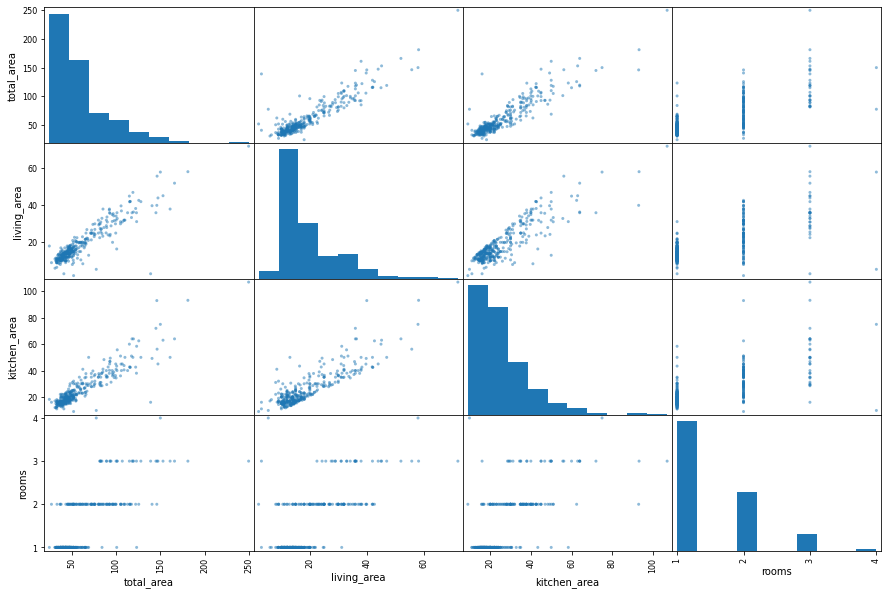

In [16]:
data_kit_liv_area = data[data['kitchen_area'] > data['living_area']]
data_kit_liv_area_1 = data_kit_liv_area[['total_area', 'living_area', 'kitchen_area', 'rooms']]
pd.plotting.scatter_matrix(data_kit_liv_area_1, figsize=(15, 10));

Мы проверили несколько условий:
1. Что бы этаж квартиры не был большим чем общее количество этажей в доме. Для этого мы перевели колонку 'floor' в формат 'float64', для того что бы можно было сравнить колонки 'floor' и 'floors_total'.
2. Что бы жилая пложадь квартиры не была больше общей площади.
3. Что бы площадь кухни не была больше общей площади
4. Что бы сумма жилой площади и площади кухни не была больше общей площади.

Выяснелось, что в данных присутствует 64 квартиры у которых не выполняется четвертое условие.

Еще мы нашли 355 квартир, в которых площадь кухни больше жилой площади. Изучив эти квартиры на графике мы не обнаружили подозрительных квартир. У таких квартир обнаружена положительная связь между общей площадью и площадью кухни, общей площадью и жилой площадью, и даже между жилой площадью и площадью кухни - не смотря на то, что площадь кухни больше жилой площади. Видимо это действительно такие квартиры - а не ошибки внесения данных.

In [17]:
print(data['studio'].value_counts())
print(data['open_plan'].value_counts())
print(data['rooms'].value_counts())
print(len(data[(data['rooms'] == 0)&(data['studio'] == True)&(data['open_plan'] == False)]))
print(len(data[(data['rooms'] == 0)&(data['open_plan'] == True)&(data['studio'] == False)]))
print(len(data[(data['rooms'] == 0)&(data['studio'] == True)&(data['open_plan'] == True)]))

False    23501
True       149
Name: studio, dtype: int64
False    23583
True        67
Name: open_plan, dtype: int64
1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64
138
59
0


Мы предположили, что квартиры с 0 количеством комнат - это могут быть квартиры студии или с открытой планировкой. 
Мы проанализировали эти данные. Всего 194 квартиры с 0-комнат, 147 студий и 66 квартир с открытой планировкой. Из 194 квартир с 0-комнат, оказалось 136 - студий и 58 - с открытой планировкой, и того все 194 квартиры. Таким образом 0 - комнат, это не ошибка, а реальнные данные означающие, что это либо студия, либо квартира с открытой планировкой. 

In [18]:
data = data.drop(data[data['living_area'] + data['kitchen_area'] > data['total_area']].index).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23586 entries, 0 to 23585
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23586 non-null  int64         
 1   last_price            23586 non-null  float64       
 2   total_area            23586 non-null  float64       
 3   first_day_exposition  23586 non-null  datetime64[ns]
 4   rooms                 23586 non-null  int64         
 5   ceiling_height        14448 non-null  float64       
 6   floors_total          23501 non-null  float64       
 7   living_area           21688 non-null  float64       
 8   floor                 23586 non-null  float64       
 9   is_apartment          23586 non-null  bool          
 10  studio                23586 non-null  bool          
 11  open_plan             23586 non-null  bool          
 12  kitchen_area          21317 non-null  float64       
 13  balcony         

Далее мы удалили из данных такие квартиры (у которых не выполняется условие - сумма жилой площади и кухни меньше общей плоощади). И перезаписали индексы. Оставив при этом квартиры с пропусками данных в жилой площади и в площади кухни.

In [19]:
data.duplicated().sum()

0

Явные дупликаты отсутствуют. Будем искать неявные дупликаты.

In [20]:
local = data['locality_name'].sort_values().unique()
print(len(local))
print(local)
data['locality_name'] = (data['locality_name'].str.replace('ё', 'е').replace('Кудрово', 'деревня Кудрово'))
data['locality_name'] = (data['locality_name'].replace('Любань', 'поселок Любань'))
data['locality_name'] = (data['locality_name'].replace('Мурино', 'поселок Мурино'))
data['locality_name'] = (data['locality_name'].replace('Никольское', 'поселок Нткольское'))
data['locality_name'] = (data['locality_name'].str.replace('городской поселок', 'поселок городского типа'))
data['locality_name'] = (data['locality_name'].replace('поселок Рябово', 'поселок городского типа Рябово'))

local = data['locality_name'].sort_values().unique()
print(len(local))
print(local)

364
['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'де

Мы сделали замену буквы ё на е и дублированых названий населенных пуктов: 
1. Кудрово на деревня Кудрово
2. Любань на поселок Любань
3. Мурино на поселок Мурино
4. Никольское на село Никольское
5. Словосочетание "городской поселок" на "поселок городского типа"
6. поселок Рябово на поселок городского типа Рябово

И проверили произашла ли замена названий

### Добавьте в таблицу новые столбцы

In [21]:
data['price_m_squ'] = round((data['last_price']/data['total_area']), 2)
data['price_m_squ']

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23581     72490.85
23582     52542.37
23583     44091.71
23584    149511.40
23585     41795.67
Name: price_m_squ, Length: 23586, dtype: float64

Дабавили в таблицу столбец - 'price_m_squ' - цена одного квадратного метра

In [22]:
data['day_week_exp'] = data['first_day_exposition'].dt.weekday
data['day_week_exp']

0        3
1        1
2        3
3        4
4        1
        ..
23581    1
23582    0
23583    6
23584    1
23585    4
Name: day_week_exp, Length: 23586, dtype: int64

Добавили в данные столбец - 'day_week_exp' - день недели публикации объявления

In [23]:
data['month_exp'] = data['first_day_exposition'].dt.month
data['month_exp']

0         3
1        12
2         8
3         7
4         6
         ..
23581     3
23582     1
23583     2
23584     3
23585     7
Name: month_exp, Length: 23586, dtype: int64

Добавили в данные столбец - 'month_exp' - месяц публикации объявления

In [24]:
data['year_exp'] = data['first_day_exposition'].dt.year
data['year_exp']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23581    2017
23582    2018
23583    2018
23584    2017
23585    2017
Name: year_exp, Length: 23586, dtype: int64

Добавили в данные столбец - 'year_exp' - год публикации объявления

In [25]:
def tip_floor(row):
    floor = row['floor']
    total = row['floors_total']
    if floor > 1 and floor == total:
            return 'последний'   
    if floor == 1:
            return 'первый'
    if floor > 1 and floor == total:
            return 'последний'
    if floor > 1 and floor < total:
            return 'другой'
    
data['tip_floor'] = data.apply(tip_floor, axis=1)
print(data['tip_floor'].unique())
print(data['tip_floor'].count())
data['tip_floor'].value_counts()

['другой' 'первый' 'последний' None]
23504


другой       17280
последний     3316
первый        2908
Name: tip_floor, dtype: int64

Добавили в данные столбец - 'tip_floor' - тип этажа квартиры (значения - "первый", "последний", "другой"). При этом в тех строках где в 'floors_total' этажи не указаны, а 'floor' больше 1, мы оставили пропуски. Так как "другой" подразумевает, что это не первый и не последний этаж, а в строках где нет данных для 'floors_total' - невозможно сказать последний это этаж или другой, можно сказать только, что это "первый".

In [26]:
data['cityCenter_km'] = round(data['cityCenters_nearest']/1000)
data['cityCenter_km']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23581     4.0
23582     NaN
23583     NaN
23584    10.0
23585     NaN
Name: cityCenter_km, Length: 23586, dtype: float64

Добавили в данные столбец - 'cityCenter_km' - расстояние до центра города в километрах.

### Проведите исследовательский анализ данных

count    23586.000000
mean        60.360323
std         35.692871
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64


<AxesSubplot:>

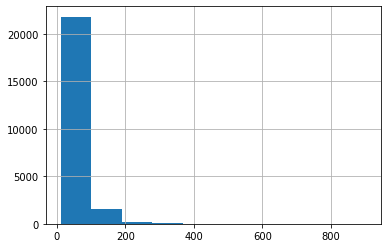

In [27]:
print(data['total_area'].describe())
data['total_area'].hist()

<AxesSubplot:>

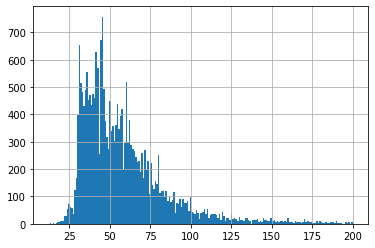

In [28]:
data['total_area'].hist(bins=200, range=(12, 200))

Мы оценили минимум и максимум общей площади. Далее будем смотреть отдельно квартиры у которых общая площадь менее 30 кв.м, квартиры у которых общая площадь более 100 кв.м. и квартиры с общей площадью от 30 кв.м. до 100 кв.м.

686
1    519
0    161
2      6
Name: rooms, dtype: int64
1     8005
2     7902
3     5786
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64
False    566
True     120
Name: studio, dtype: int64
False    23437
True       149
Name: studio, dtype: int64
113
138
count    609.000000
mean      16.437783
std        2.713403
min        2.000000
25%       15.000000
50%       16.200000
75%       18.000000
max       25.000000
Name: living_area, dtype: float64
count    21688.000000
mean        34.430052
std         22.052261
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64
count    316.000000
mean       6.041741
std        1.596359
min        1.300000
25%        5.000000
50%        6.000000
75%        6.825000
max       16.000000
Name: kitchen_area, dtype: float64
count    2131

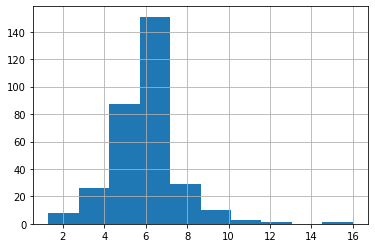

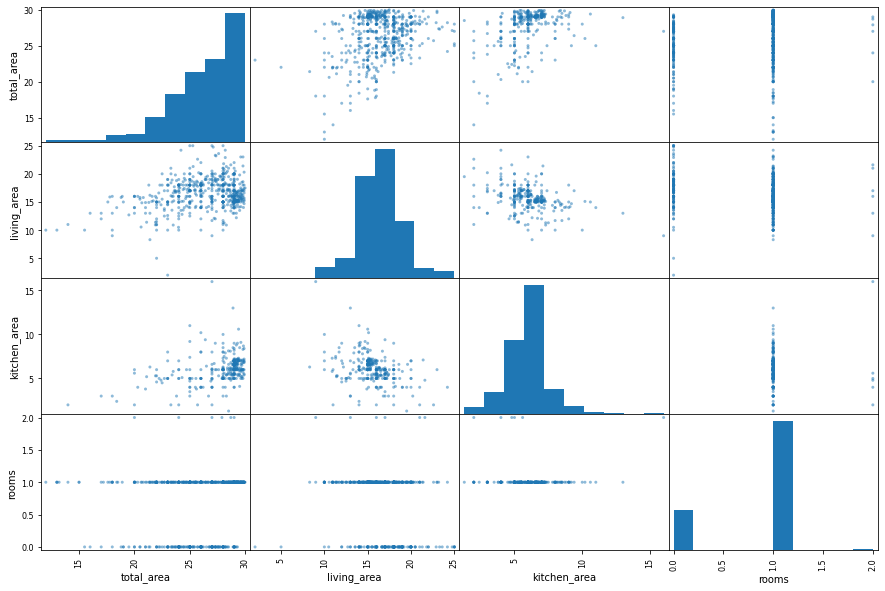

In [29]:
area_30 = data[data['total_area'] < 30]
print(len(area_30))
area_30['kitchen_area'].hist()
print(area_30['rooms'].value_counts())
print(data['rooms'].value_counts())
print(area_30['studio'].value_counts())
print(data['studio'].value_counts())
area_30_s = area_30[(area_30['rooms'] == 0)&(area_30['studio'] == True)]
print(len(area_30_s))
data_s = data[(data['rooms'] == 0)&(data['studio'] == True)]
print(len(data_s))
print(area_30['living_area'].describe())
print(data['living_area'].describe())
print(area_30['kitchen_area'].describe())
print(data['kitchen_area'].describe())
print(area_30['rooms'].describe())
print(data['rooms'].describe())
area_30_r = area_30[['total_area', 'living_area', 'kitchen_area', 'rooms']]
area_30_r.head()
pd.plotting.scatter_matrix(area_30_r, figsize=(15, 10));

data.info()
data = data.drop(data[(data['total_area'] < 30)&(data['living_area'] <= 5)].index).reset_index(drop=True)
data.info()

Проанализировав квартиры с общей площадью менее 30 кв.м. мы не нашли выбивающихся данных. Общая площадь квартиры должна быть связана с жилой площадью, а так же отражаться на площади кухни и количестве комнат. У квартир с маленькой общей площадью должна быть маленькая жилая площадь, маленькая площадь кухни и небольшое количество комнат. Анализ данных показал, что это действительно так. Количество комнат в таких квартирах не более двух. Из 149 студий, 120 находяться в этой группе квартир. Так же мы не стали удалять квартиры с 0 количеством комнат в этой группе, т.к. из 161 такой квартиры, для 113 указано, что это студии. Поэтому мы предполагаем, что квартиры с 0 к-вом комнат - это маленькие квартиры-студии.  Так же график показал, что есть положительная связь между общей площадью и жилой. Единственное, нас смутили две квартиры с 2кв.м. и 5кв.м. жилой площади среди где-то 23 кв.м. общей площади. Эти квартиры мы удалили и перезаписали индексы.

count    1650.000000
mean       86.048345
std        40.304869
min         3.000000
25%        63.000000
50%        75.225000
75%        95.175000
max       409.700000
Name: living_area, dtype: float64
count    21686.000000
mean        34.432905
std         22.051273
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64
count    1666.000000
mean       20.675792
std        11.981192
min         5.000000
25%        13.400000
50%        17.000000
75%        23.500000
max       112.000000
Name: kitchen_area, dtype: float64
count    21317.000000
mean        10.554513
std          5.889079
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64
count    1830.000000
mean        3.985246
std         1.422040
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        19.000000
Name: 

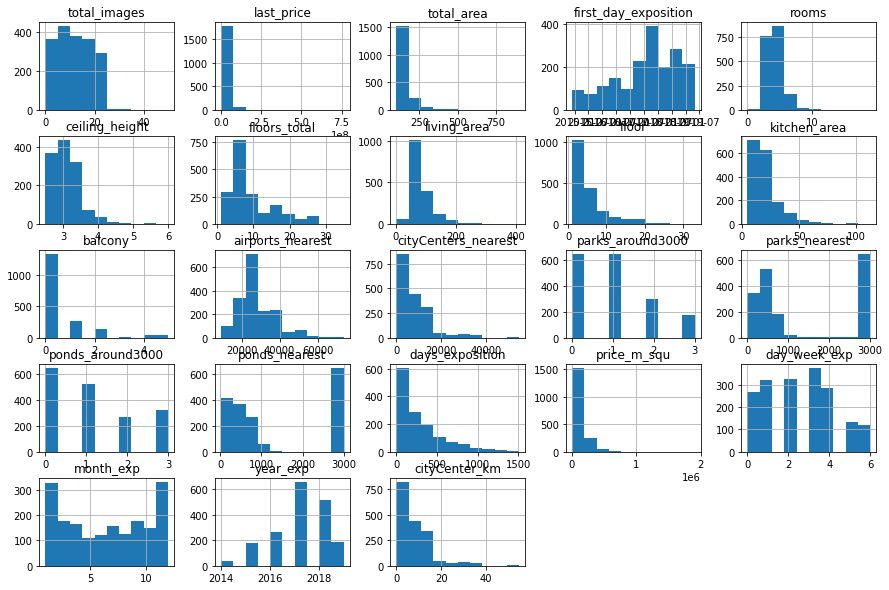

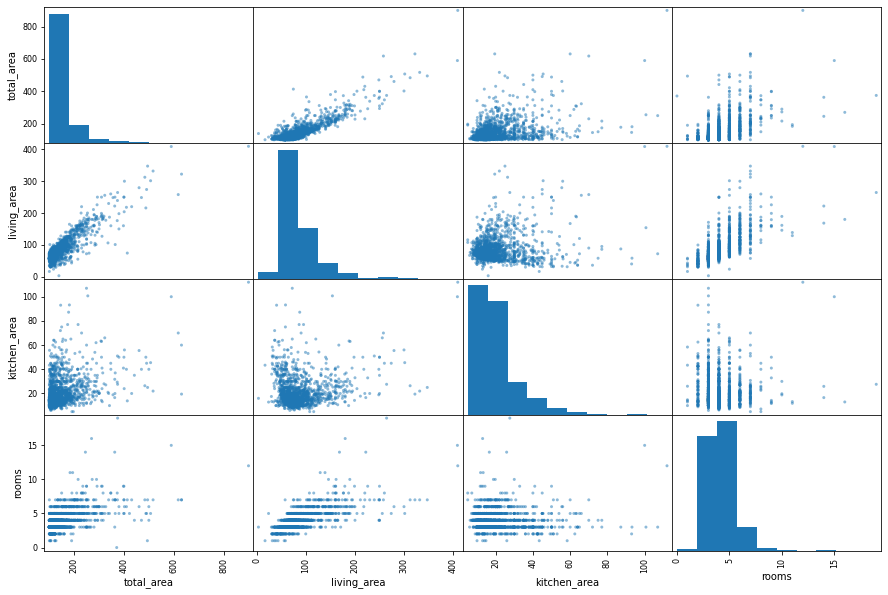

In [30]:
area_100 = data[data['total_area'] > 100]
area_100.hist(figsize=(15, 10))
print(area_100['living_area'].describe())
print(data['living_area'].describe())
print(area_100['kitchen_area'].describe())
print(data['kitchen_area'].describe())
print(area_100['rooms'].describe())
print(data['rooms'].describe())
area_100_r = area_100[['total_area', 'living_area', 'kitchen_area', 'rooms']]
area_100_r.head()
pd.plotting.scatter_matrix(area_100_r, figsize=(15, 10));

In [31]:
data.info()
data = data.drop(data[(data['total_area'] > 100) & (data['rooms'] <= 2)].index).reset_index(drop=True)
data = data.drop(data[((data['total_area'] >= 100)&(data['total_area'] <= 200)) & (data['living_area'] <= 40)].index).reset_index(drop=True)
data = data.drop(data[((data['total_area'] > 200)&(data['total_area'] <= 300)) & (data['living_area'] <= 90)].index).reset_index(drop=True)
data = data.drop(data[(data['total_area'] > 300)&(data['living_area'] <= 140)].index).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23584 entries, 0 to 23583
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23584 non-null  int64         
 1   last_price            23584 non-null  float64       
 2   total_area            23584 non-null  float64       
 3   first_day_exposition  23584 non-null  datetime64[ns]
 4   rooms                 23584 non-null  int64         
 5   ceiling_height        14448 non-null  float64       
 6   floors_total          23499 non-null  float64       
 7   living_area           21686 non-null  float64       
 8   floor                 23584 non-null  float64       
 9   is_apartment          23584 non-null  bool          
 10  studio                23584 non-null  bool          
 11  open_plan             23584 non-null  bool          
 12  kitchen_area          21317 non-null  float64       
 13  balcony         

Мы удалили из данных те квартиры, у которых при общей площади более 100 кв.м. менее 3 комнат.

А также те квартиры у которых при общей площади: 
1. от 100 кв.м. до 200 кв.м. жилая площадь менее, либо равнв 40 кв.м.
2. от 200 кв.м. до 300 кв.м. жилая площадь менее, либо равна 90 кв.м.
3. более 300 кв.м. жилая площадь менее, либо равна 140 кв.м.

Такие квартиры нам показались не правдоподобными и видимо где-то была допущена ошибка при внесении данных. После удаления мы переписали индексы.

count    19424.000000
mean        30.609174
std         12.399220
min          2.000000
25%         18.500000
50%         29.800000
75%         39.700000
max         89.100006
Name: living_area, dtype: float64
count    21574.000000
mean        34.341026
std         22.022497
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        409.700000
Name: living_area, dtype: float64
count    19330.000000
mean         9.752172
std          3.993372
min          2.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         50.000000
Name: kitchen_area, dtype: float64
count    21199.000000
mean        10.447764
std          5.565625
min          1.300000
25%          7.000000
50%          9.060000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64
count    21065.000000
mean         1.946926
std          0.856452
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max 

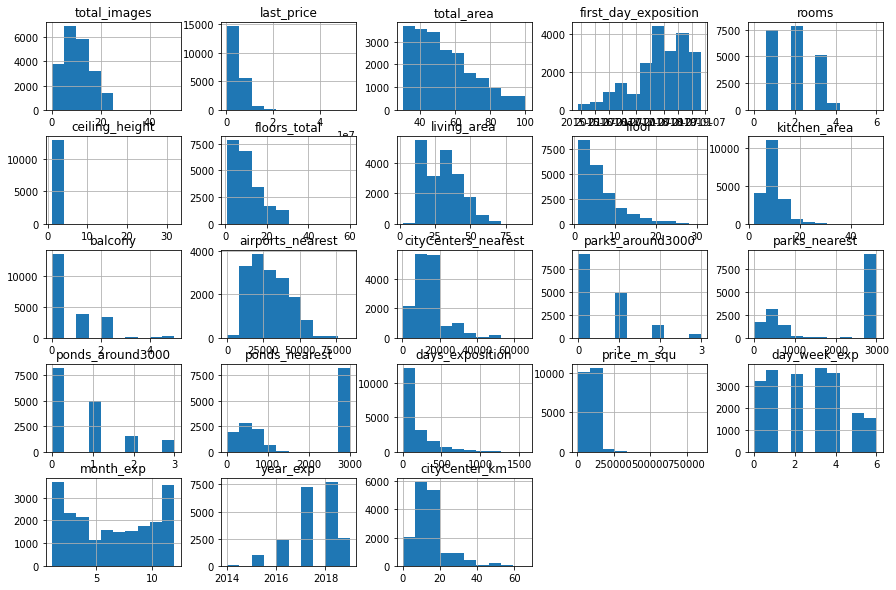

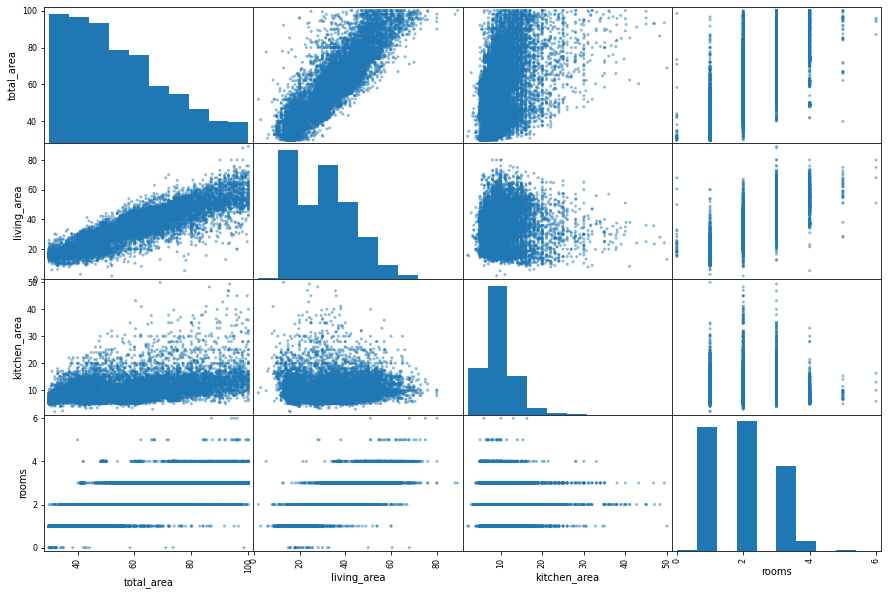

In [32]:
area_30_100 = data[(data['total_area'] >= 30) &(data['total_area'] <= 100)]
area_30_100.hist(figsize=(15, 10));
print(area_30_100['living_area'].describe())
print(data['living_area'].describe())
print(area_30_100['kitchen_area'].describe())
print(data['kitchen_area'].describe())
print(area_30_100['rooms'].describe())
print(data['rooms'].describe())

area_30_100_r = area_30_100[['total_area', 'living_area', 'kitchen_area', 'rooms']]
area_30_100_r.head()
pd.plotting.scatter_matrix(area_30_100_r, figsize=(15, 10));



In [33]:
data.info()
data = data.drop(data[((data['total_area'] >= 30)&(data['total_area'] <= 50)) & (data['living_area'] <= 10)].index).reset_index(drop=True)
data = data.drop(data[((data['total_area'] > 50)&(data['total_area'] <= 75)) & (data['living_area'] <= 20)].index).reset_index(drop=True)
data = data.drop(data[((data['total_area'] > 75)&(data['total_area'] < 100)) & (data['living_area'] <= 30)].index).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23453 entries, 0 to 23452
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23453 non-null  int64         
 1   last_price            23453 non-null  float64       
 2   total_area            23453 non-null  float64       
 3   first_day_exposition  23453 non-null  datetime64[ns]
 4   rooms                 23453 non-null  int64         
 5   ceiling_height        14363 non-null  float64       
 6   floors_total          23368 non-null  float64       
 7   living_area           21574 non-null  float64       
 8   floor                 23453 non-null  float64       
 9   is_apartment          23453 non-null  bool          
 10  studio                23453 non-null  bool          
 11  open_plan             23453 non-null  bool          
 12  kitchen_area          21199 non-null  float64       
 13  balcony         

При рассмотрении квартир с общей площадью от 30 до 100 кв.м. мы удалили те квартиры у которых при общей площади: 
1. от 30 кв.м. до 50 кв.м. жилая площадь менее, либо равнв 10 кв.м.
2. от 50 кв.м. до 75 кв.м. жилая площадь менее, либо равна 20 кв.м.
3. от 75 кв.м. до 100 кв.м. жилая площадь менее, либо равна 30 кв.м.

Такие квартиры так же нам показались не правдоподобными и видимо где-то была допущена ошибка при внесении данных. После удаления мы переписали индексы.


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m_squ,day_week_exp,month_exp,year_exp,cityCenter_km
count,23227.000000,2.322700e+04,23227.000000,23227.000000,14222.000000,23145.000000,21348.000000,23227.000000,20988.000000,23227.000000,17757.000000,17778.000000,17779.000000,17779.000000,17779.000000,17779.000000,20139.000000,2.322700e+04,23227.000000,23227.000000,23227.000000,17778.000000
mean,9.844190,6.435266e+06,59.942115,2.075817,2.765842,10.663988,34.516670,5.879881,10.349765,0.589874,28769.407501,14240.807684,0.607852,1888.132628,0.763260,1762.454975,180.255028,9.878241e+04,2.571103,6.401128,2017.371852,14.234278
std,5.675096,1.066606e+07,35.117353,1.081089,1.239071,6.587698,22.063405,4.871008,5.427910,0.958879,12654.130566,8605.565413,0.799086,1267.180401,0.932669,1255.698855,219.270384,4.859524e+04,1.788399,3.491349,1.035271,8.613256
min,0.000000,4.300000e+05,12.000000,0.000000,1.000000,1.000000,8.300000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,7.962960e+03,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.600000,2.000000,7.000000,0.000000,18500.000000,9364.250000,0.000000,490.500000,0.000000,504.500000,45.000000,7.643312e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13138.000000,0.000000,3000.000000,0.000000,3000.000000,95.000000,9.477273e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.700000e+06,69.000000,3.000000,2.800000,16.000000,42.332500,8.000000,11.817500,1.000000,37310.000000,16314.250000,1.000000,3000.000000,1.000000,3000.000000,231.000000,1.136977e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3000.000000,3.000000,3000.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


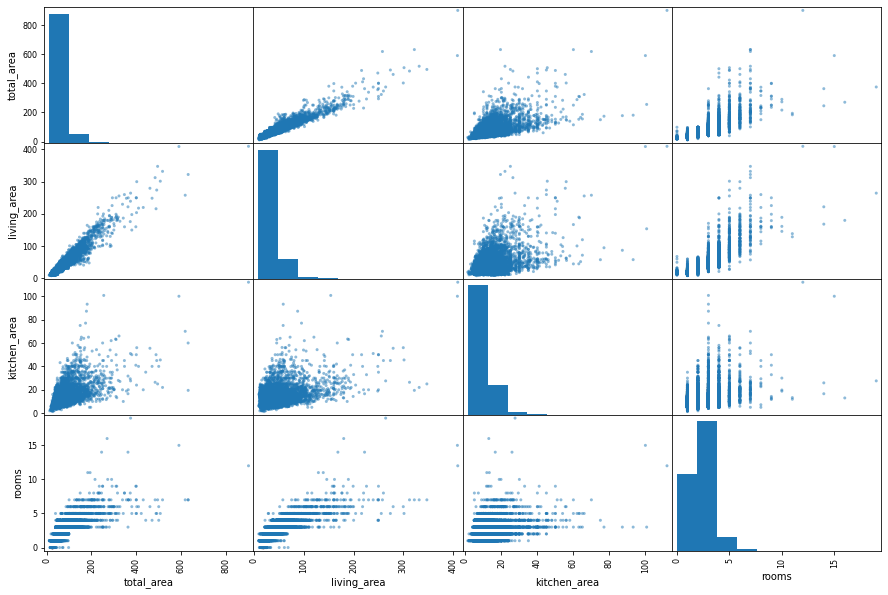

In [34]:
area = data[['total_area', 'living_area', 'kitchen_area', 'rooms']]
area.head()
pd.plotting.scatter_matrix(area, figsize=(15, 10));

data.describe()

Таким образом мы проанализировали данные по общей площади, жилой площади, площади кухни и количеству комнат. Удалили 384 квартиры, на наш взгляд с не корректными данными. В основном квартиры - с очень большой общей площадью и маленькой жилой площадью, а так же квартиры с очень большой площадью, но с небольшим количеством комнат.

<AxesSubplot:>

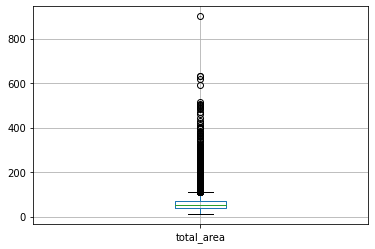

In [35]:
data.boxplot(column=['total_area'])

Мы оцении 1.5 квартильный размах для общей площади (43,5 кв.м), прибавим его к Q3 и получим максимальную границу адекватных данных (112,5 кв.м). За ней аномальные данные. Удалим их (поставим границу не 112.5 кв.м, а чуть больше 150кв.м.) и перезапишем индексы.

In [36]:
data.info()
data = data.drop(data[data['total_area'] > 150].index).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23227 entries, 0 to 23226
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23227 non-null  int64         
 1   last_price            23227 non-null  float64       
 2   total_area            23227 non-null  float64       
 3   first_day_exposition  23227 non-null  datetime64[ns]
 4   rooms                 23227 non-null  int64         
 5   ceiling_height        14222 non-null  float64       
 6   floors_total          23145 non-null  float64       
 7   living_area           21348 non-null  float64       
 8   floor                 23227 non-null  float64       
 9   is_apartment          23227 non-null  bool          
 10  studio                23227 non-null  bool          
 11  open_plan             23227 non-null  bool          
 12  kitchen_area          20988 non-null  float64       
 13  balcony         

In [37]:
data['total_area'].describe()

count    22689.000000
mean        56.268021
std         22.717925
min         12.000000
25%         40.000000
50%         51.000000
75%         67.200000
max        150.000000
Name: total_area, dtype: float64

<AxesSubplot:>

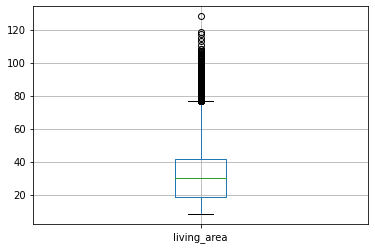

In [38]:
data.boxplot(column=['living_area'])

In [39]:
print(data['living_area'].describe())
data.info()
data = data.drop(data[data['living_area'] > 80].index).reset_index(drop=True)
data.info()

count    20872.000000
mean        32.396219
std         15.378162
min          8.300000
25%         18.500000
50%         30.000000
75%         41.700000
max        128.000000
Name: living_area, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22689 entries, 0 to 22688
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22689 non-null  int64         
 1   last_price            22689 non-null  float64       
 2   total_area            22689 non-null  float64       
 3   first_day_exposition  22689 non-null  datetime64[ns]
 4   rooms                 22689 non-null  int64         
 5   ceiling_height        13857 non-null  float64       
 6   floors_total          22608 non-null  float64       
 7   living_area           20872 non-null  float64       
 8   floor                 22689 non-null  float64       
 9   is_apartment          22689 non-null  

In [40]:
data['living_area'].describe()

count    20626.000000
mean        31.705129
std         14.069199
min          8.300000
25%         18.500000
50%         30.000000
75%         41.000000
max         80.000000
Name: living_area, dtype: float64

Мы оцении 1.5 квартильный размах для жилой площади (34,8 кв.м), прибавим его к Q3 и получим максимальную границу адекватных данных (76,5 кв.м). За ней аномальные данные. Удалим их (поставим границу не 76.5 кв.м, а чуть больше 80 кв.м.) и перезапишем индексы.

<AxesSubplot:>

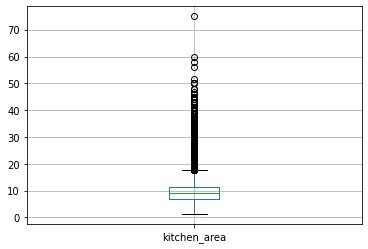

In [41]:
data.boxplot(column=['kitchen_area'])

In [42]:
data['kitchen_area'].describe()

count    20277.000000
mean         9.939463
std          4.420530
min          1.300000
25%          7.000000
50%          9.000000
75%         11.300000
max         75.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

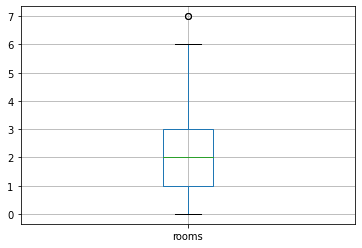

In [43]:
data.boxplot(column=['rooms'])

In [44]:
data['rooms'].describe()

count    22443.000000
mean         1.980662
std          0.920840
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

После того как мы удалили квартиры с общей площадью, а так же с жилой площадью чуть более Q3+1.5 квартильного интервала, у нас автоматически удалились квартиры с большой площадью кухни и большим количеством комнат. 

Сильно сократились ошибки средних, уменьшились сами средние и стали гораздо ближе к 50% квартилям. Данные по общей площади, жилой площади, площади кухни и количеству комнат стали более правильные.

count    2.244300e+04
mean     5.490976e+06
std      4.007268e+06
min      4.300000e+05
25%      3.390000e+06
50%      4.500000e+06
75%      6.400000e+06
max      1.240000e+08
Name: last_price, dtype: float64

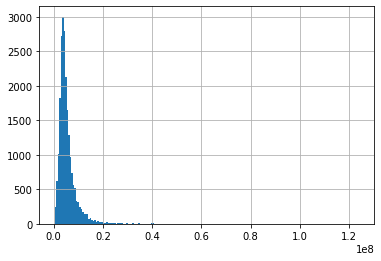

In [45]:
data['last_price'].hist(bins=200)
data['last_price'].describe()

Опираясь на разброс цен, далее мы будем рассматривать цены двумя частями. От 400000 руб. до 15000000 руб. и от 15000000 руб. до 550000000 руб.

<AxesSubplot:>

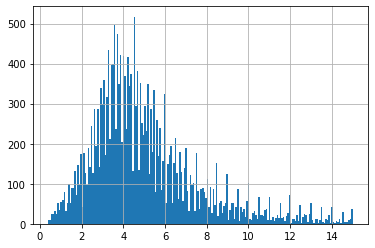

In [46]:
last_price_6 = data['last_price']/1000000
last_price_6.hist(bins=200, range=(0.4, 15))

<AxesSubplot:>

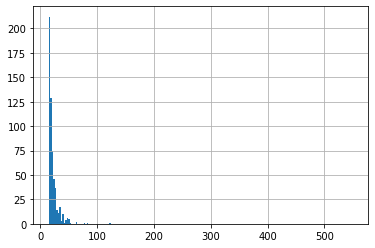

In [47]:
last_price_6.hist(bins=200,range=(15, 550))

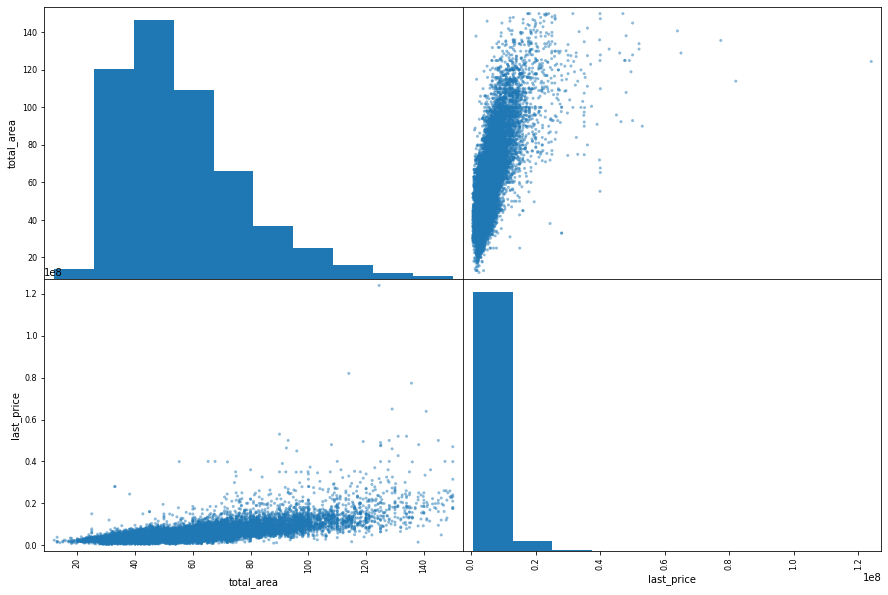

In [48]:
price = data[['total_area', 'last_price']]
price.head()
pd.plotting.scatter_matrix(price, figsize=(15, 10));

Проанализировав данные по цене квартир - мы не заметили выбивающихся данных. Очень дорогие квартиры - это квартиры большой площади... Основная масса квартир продается по цене от 1000000 до 8000000 руб.

<AxesSubplot:>

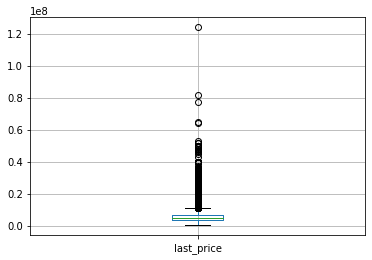

In [49]:
data.boxplot(column=['last_price'])

In [50]:
data.info()
data = data.drop(data[data['last_price'] > 50000000].index).reset_index(drop=True)
data.info()
data['last_price'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22443 entries, 0 to 22442
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22443 non-null  int64         
 1   last_price            22443 non-null  float64       
 2   total_area            22443 non-null  float64       
 3   first_day_exposition  22443 non-null  datetime64[ns]
 4   rooms                 22443 non-null  int64         
 5   ceiling_height        13670 non-null  float64       
 6   floors_total          22363 non-null  float64       
 7   living_area           20626 non-null  float64       
 8   floor                 22443 non-null  float64       
 9   is_apartment          22443 non-null  bool          
 10  studio                22443 non-null  bool          
 11  open_plan             22443 non-null  bool          
 12  kitchen_area          20277 non-null  float64       
 13  balcony         

count    2.243500e+04
mean     5.467561e+06
std      3.787198e+06
min      4.300000e+05
25%      3.390000e+06
50%      4.500000e+06
75%      6.400000e+06
max      5.000000e+07
Name: last_price, dtype: float64

Мы оцении 1.5 квартильный размах для стоимости (4515000 руб.), прибавим его к Q3 и получим максимальную границу адекватных данных (10915000 руб.). За ней аномальные данные. Удалим их (поставим границу не 10915000 руб., а больше 50000000 руб.) и перезапишем индексы.

Сильно сократилась ошибка средней, уменьшилась сама средняя и стала гораздо ближе к 50% квартили. Данные по стоимости квартиры стали более правильные.

<AxesSubplot:>

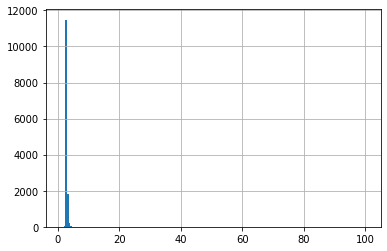

In [51]:
data['ceiling_height'].hist(bins=200)

count    13665.000000
mean         2.747283
std          1.257385
min          1.000000
25%          2.500000
50%          2.640000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


<AxesSubplot:>

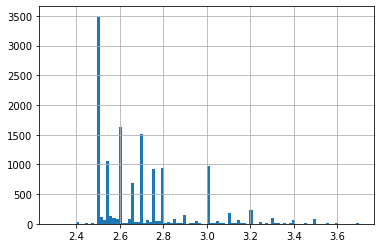

In [52]:
print(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins=100, range=(2.3, 3.7))

       total_images  last_price  total_area first_day_exposition  rooms  \
513              11   2999000.0       33.50           2017-03-30      1   
1471              4   4100000.0       45.60           2016-01-13      2   
2404              4   2400000.0       62.00           2018-12-27      3   
3968              1   2120000.0       35.43           2017-12-18      1   
5192             17   2200000.0       56.00           2018-04-02      2   
5392              5   1500000.0       42.80           2017-08-14      2   
5525              9   1650000.0       35.50           2018-05-29      1   
10726             4   3300000.0       36.00           2017-06-18      1   
12054             2   1400000.0       22.50           2017-09-21      1   
15571             6  12300000.0       88.30           2019-03-12      3   
15988             0   1500000.0       33.00           2018-10-03      1   
16035             5   4100000.0       40.00           2017-10-17      1   
16811            20   230

<AxesSubplot:>

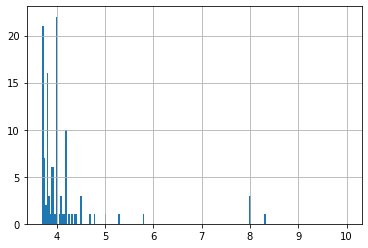

In [53]:
ceiling_hei = data[data['ceiling_height'] <= 2.3]
print(ceiling_hei)
data['ceiling_height'].hist(bins=200, range=(3.7, 10))

<AxesSubplot:>

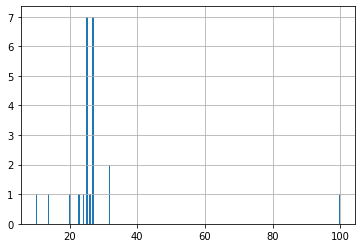

In [54]:
data['ceiling_height'].hist(bins=200, range=(10, 100))

In [55]:
ceiling_height = data[(data['ceiling_height'] >= 4)&(data['ceiling_height'] <= 10)]
print(ceiling_height['locality_name'].value_counts())
ceiling_height_2 = data[(data['ceiling_height'] >= 4)&(data['ceiling_height'] <= 10)&(data['locality_name'] != 'Санкт-Петербург')]
print(ceiling_height_2)
ceiling_height_3 = ceiling_height_2[ceiling_height_2['ceiling_height'] >= 8]
ceiling_height_3['locality_name'].value_counts()

Санкт-Петербург                    42
Всеволожск                          2
Выборг                              2
Бокситогорск                        1
Красное Село                        1
Кронштадт                           1
Сестрорецк                          1
деревня Нурма                       1
поселок городского типа Рощино      1
поселок городского типа Токсово     1
Пушкин                              1
Name: locality_name, dtype: int64
       total_images  last_price  total_area first_day_exposition  rooms  \
971              13    550000.0        29.0           2018-02-01      1   
2541             10   3900000.0        68.0           2018-03-13      3   
2642              8   2700000.0        39.0           2018-02-01      1   
2880             13   6600000.0        95.0           2018-09-08      2   
3268              3   1400000.0        30.0           2018-03-16      1   
3553             20  15300000.0        92.2           2019-03-14      3   
6252             17   3

Красное Село     1
деревня Нурма    1
Name: locality_name, dtype: int64

Мы проанализировали данные по высоте потолков. Посмотрели распределение высоты тремя кусками (2.3, 3.7) (3.7, 10) (10, 100). Ниже мы удалим квартиры с потолками менее 2 метров, 14 м. и 100 м. считаем, что такие низкие и такие высокие потолки не могут быть, и это ошибочные данные. Проанализировав квартиры с потолками от 4 до 10 метров, выяснили, что из 85 таких квартир 73 находятся в Санкт-Петербурге, это вполне вероятно. В этом городе в старом жилом фонде могут быть потолки до 10 метров. Так же мы оставили две квартиры с 8 м. потолками не в Санкт-Петербурге (деревня Нурма и Красное село), возможно это частный дом и в этом случае такие потолки вполне возможны.

Так же ниже мы заменили значения:
1. 27.0 на 2.7
2. 25.0 на 2.5
3. 32.0 на 3.2
4. 20.0 на 2.0
5. 24.0 на 2.4
6. 22.6 на 2.26
7. 26.0 на 2.6

In [56]:
ceiling_height_4 = data[data['ceiling_height'] >= 10]
print(ceiling_height_4['locality_name'].value_counts())
print(ceiling_height_4['ceiling_height'].value_counts())

Санкт-Петербург       14
поселок Мурино         2
Гатчина                1
Кронштадт              1
поселок Новый Свет     1
Луга                   1
деревня Нижняя         1
Волхов                 1
деревня Мины           1
Name: locality_name, dtype: int64
27.0     7
25.0     7
32.0     2
14.0     1
20.0     1
24.0     1
10.3     1
22.6     1
26.0     1
100.0    1
Name: ceiling_height, dtype: int64


In [57]:
data['ceiling_height'] = (data['ceiling_height'].replace(27.0, 2.7))
data['ceiling_height'] = (data['ceiling_height'].replace(25.0, 2.5))
data['ceiling_height'] = (data['ceiling_height'].replace(32.0, 3.2))
data['ceiling_height'] = (data['ceiling_height'].replace(20.0, 2.0))
data['ceiling_height'] = (data['ceiling_height'].replace(24.0, 2.4))
data['ceiling_height'] = (data['ceiling_height'].replace(22.6, 2.26))
data['ceiling_height'] = (data['ceiling_height'].replace(26.0, 2.6))

In [58]:
data.info()
data = data.drop(data[(data['ceiling_height'] < 2)].index).reset_index(drop=True)
data = data.drop(data[(data['ceiling_height'] == 14)].index).reset_index(drop=True)
data = data.drop(data[(data['ceiling_height'] == 100)].index).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22435 entries, 0 to 22434
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22435 non-null  int64         
 1   last_price            22435 non-null  float64       
 2   total_area            22435 non-null  float64       
 3   first_day_exposition  22435 non-null  datetime64[ns]
 4   rooms                 22435 non-null  int64         
 5   ceiling_height        13665 non-null  float64       
 6   floors_total          22355 non-null  float64       
 7   living_area           20619 non-null  float64       
 8   floor                 22435 non-null  float64       
 9   is_apartment          22435 non-null  bool          
 10  studio                22435 non-null  bool          
 11  open_plan             22435 non-null  bool          
 12  kitchen_area          20270 non-null  float64       
 13  balcony         

count    13660.000000
mean         2.705354
std          0.271978
min          2.000000
25%          2.500000
50%          2.640000
75%          2.790000
max         10.300000
Name: ceiling_height, dtype: float64

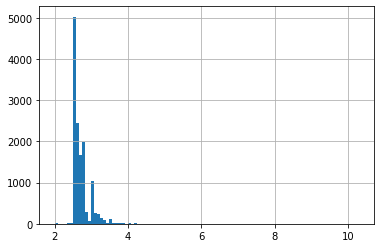

In [59]:
data['ceiling_height'].hist(bins=100)
data['ceiling_height'].describe()

<AxesSubplot:>

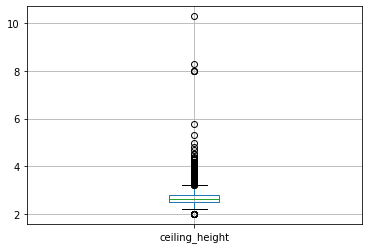

In [60]:
data.boxplot(column=['ceiling_height'])

После анализа и удаления аномальных значений высоты поталака, все же остались данные превышающие Q3+1.5 квартильный интервал. Но эти данные не сильно влияют на средее значение (оно очень близко к 50% квартиле) а так же ошибка средней не большая. Что свидетельствует в целом о хорошем сосоянии данных. 

С потолками закончили - далее смотрим этажи

<AxesSubplot:>

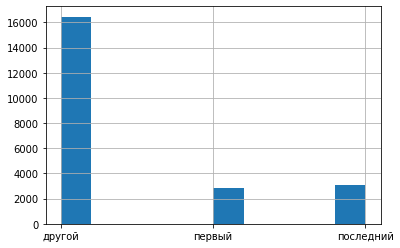

In [61]:
data['tip_floor'].hist()

Данные не вызвали сомнений. Первых примерно столько же сколько последних, наибольшее количество - других. По идее так и должно быть.

count    22350.000000
mean        10.768501
std          6.618319
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

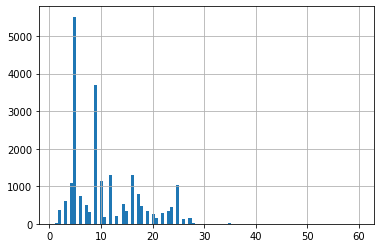

In [62]:
data['floors_total'].hist(bins=100)
data['floors_total'].describe()


<AxesSubplot:>

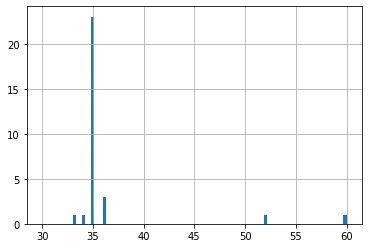

In [63]:
data['floors_total'].hist(bins=100, range=(30, 60))

In [64]:
floors_total = data[data['floors_total'] >= 35]
print(floors_total['locality_name'].value_counts())
floors_tota = data[data['floors_total'] > 50]
print(floors_tota['locality_name'].value_counts())

Санкт-Петербург    27
Кронштадт           1
Name: locality_name, dtype: int64
Санкт-Петербург    1
Кронштадт          1
Name: locality_name, dtype: int64


In [65]:
data.info()
data = data.drop(data[(data['floors_total'] > 50)].index).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22430 entries, 0 to 22429
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22430 non-null  int64         
 1   last_price            22430 non-null  float64       
 2   total_area            22430 non-null  float64       
 3   first_day_exposition  22430 non-null  datetime64[ns]
 4   rooms                 22430 non-null  int64         
 5   ceiling_height        13660 non-null  float64       
 6   floors_total          22350 non-null  float64       
 7   living_area           20614 non-null  float64       
 8   floor                 22430 non-null  float64       
 9   is_apartment          22430 non-null  bool          
 10  studio                22430 non-null  bool          
 11  open_plan             22430 non-null  bool          
 12  kitchen_area          20265 non-null  float64       
 13  balcony         

<AxesSubplot:>

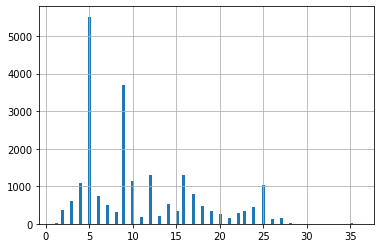

In [66]:
data['floors_total'].hist(bins=100)

Мы проанализировали данные по общему количеству этажей здания. Из 28 квартир в домах выше 35 этажей 27 расположены в Санкт-Петербурге (и только одна в Кронштадте). В Санкт-Петербурге есть дома в 42 этажа, а в Кронштадте таких высоток нет. Поэтому мы удалили две квартиры в домах выше 50 этажей.

count    22348.000000
mean        10.764453
std          6.604659
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64


<AxesSubplot:>

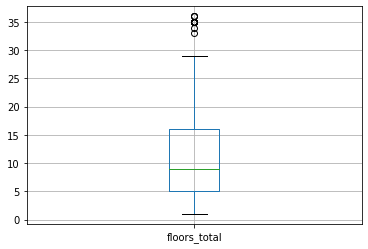

In [67]:
print(data['floors_total'].describe())
data.boxplot(column=['floors_total'])

После вышеописанного анализы мы увидели, что остались аномальные данные. Так же нас смутила высокая ошибка средней. Мы удалили аномальные данные и перепроверили - ошибка средней сильно не уменьшилась. Мы сново вернули аномальные данные в датасет (большая ошибка не их вина).

т.е. describe до удаления и после удаления аномальных данных почти не изменился - поэтому мы приняли решение не удалять аномальные данные. Т.к. считаем, что на самом деле это не "аномальные данные", а реальные и такие дома существуют в Санкт-Петербурге.

count    17005.000000
mean     14565.877742
std       8538.628419
min        208.000000
25%       9967.000000
50%      13307.000000
75%      16470.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

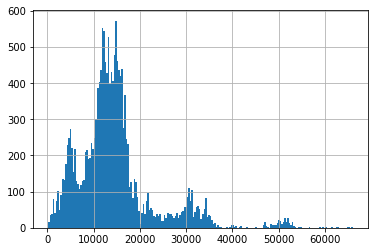

In [68]:
data['cityCenters_nearest'].hist(bins=200)
data['cityCenters_nearest'].describe()

Проанализировав весь массив данных  - расстояние до центра города, мы разбили данные на четыри части (от 0 до 7 км., от 7 км. до 25 км., от 25 км. до 38 км., от 38 км. до 70 км.) , основываясь на пиках основной гистограммы. Мы предположили, что эти пики соответствуют разным городам или разным  популярным районам одного города. Ниже будем проверять эту гипотезу.

Санкт-Петербург    2626
Name: locality_name, dtype: int64


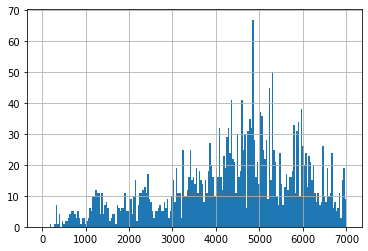

In [69]:
data['cityCenters_nearest'].hist(bins=200, range=(0, 7000))
cityCenters = data[(data['cityCenters_nearest'] >= 0)&(data['cityCenters_nearest'] <= 7000)]
print(cityCenters['locality_name'].value_counts())

Пик от 0 до 7 км. - исключительно квартиры в Санкт-Петербурге.

Санкт-Петербург      11891
поселок Парголово      318
поселок Шушары         248
поселок Стрельна        41
Пушкин                  20
поселок Мурино           2
Name: locality_name, dtype: int64


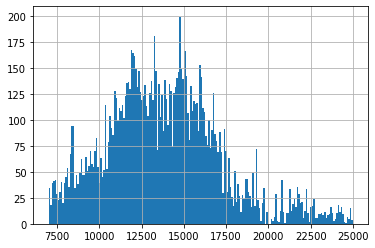

In [70]:
data['cityCenters_nearest'].hist(bins=200, range=(7000, 25000))
cityCenters_1 = data[(data['cityCenters_nearest'] > 7000)&(data['cityCenters_nearest'] <= 25000)]
print(cityCenters_1['locality_name'].value_counts())

В интервал от 7 км. до 25 км. входят в основном квартиры Санкт-Петербурга (12056 шт.), поселока Парголово (319 шт.) и поселока Шушары (248 шт.).

Колпино                    331
Пушкин                     323
поселок Шушары             184
Сестрорецк                 169
Красное Село               165
Петергоф                   147
Санкт-Петербург             85
поселок Металлострой        66
Павловск                    36
поселок Понтонный           20
Ломоносов                    9
поселок Саперный             6
поселок Песочный             4
поселок Лисий Нос            3
поселок Усть-Ижора           2
поселок Петро-Славянка       1
поселок Щеглово              1
поселок Александровская      1
поселок Левашово             1
Name: locality_name, dtype: int64


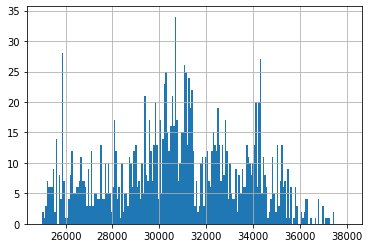

In [71]:
data['cityCenters_nearest'].hist(bins=200, range=(25000, 38000))
cityCenters_2 = data[(data['cityCenters_nearest'] > 25000)&(data['cityCenters_nearest'] <= 38000)]
print(cityCenters_2['locality_name'].value_counts())

В интервал от 25 км. до 38 км. входит наибольшее количество населенных пунктов. В Санкт-Петербурге всего 85 квартир (видимо на окрайне города).

Ломоносов             123
Кронштадт              93
Петергоф               49
Зеленогорск            23
Красное Село            8
поселок Молодежное      5
поселок Репино          2
Сестрорецк              1
поселок Белоостров      1
Name: locality_name, dtype: int64


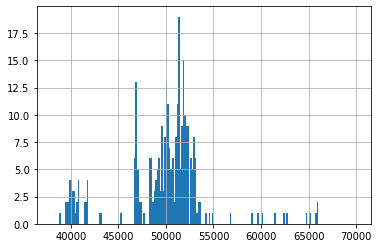

In [72]:
data['cityCenters_nearest'].hist(bins=200, range=(38000, 70000))
cityCenters_4 = data[(data['cityCenters_nearest'] > 38000)&(data['cityCenters_nearest'] <= 70000)]
print(cityCenters_4['locality_name'].value_counts())

В третий интервал (от 38 до 70 км.) входят в основном населенные пункты - Ломоносов (123 квр.), Кронштадт (94 квр.) и Петергоф (49 квр.)

При анализе расстояния до центра города, мы не обнаружили неадекватных данных. На большем удалении от центра - пригороды Санкт-Петербурга. 

Мы проверили реальные расстояния всех фигурирующих населенных пунктов от Санкт-петербурга. Полученные нами результаты соответствуют реальности.

<AxesSubplot:>

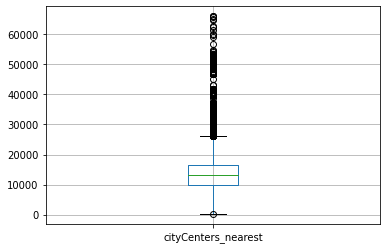

In [73]:
data.boxplot(column=['cityCenters_nearest'])

Несмотря на то, что в датасете присутствуют данные которые превышают Q3+1.5 межквартильных интервала, мы решили не удалять эти данные. Т.к. это реальные квартиры расположенные действительно на таком расстоянии от Санкт-Петербурга (мы перепроверили).

count    17006.000000
mean      1916.792309
std       1261.305379
min          1.000000
25%        503.000000
50%       3000.000000
75%       3000.000000
max       3000.000000
Name: parks_nearest, dtype: float64

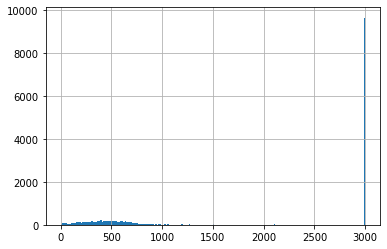

In [74]:
data['parks_nearest'].hist(bins=200)
data['parks_nearest'].describe()

Проанализировав основной массив данных по расстоянию до парка, мы разделили его на две части (от 0 до 2 км. и от 2 км. до 2,999 км.). 3 км. - означает, что до пруда более 3 км. (эти данные добавили мы, заменив NoN).

<AxesSubplot:>

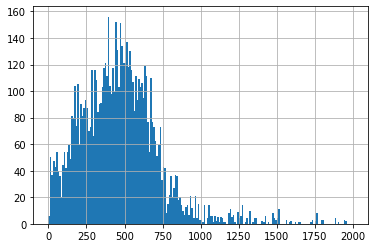

In [75]:
data['parks_nearest'].hist(bins=200, range=(0, 2000))

<AxesSubplot:>

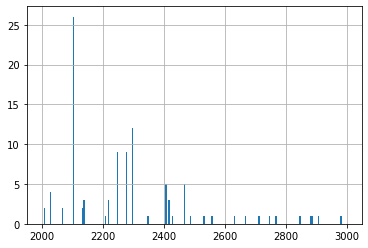

In [76]:
data['parks_nearest'].hist(bins=200, range=(2000, 2999))

Мы не нашли выбивающихся данных. В основном парки находятся в радиусе 1 км. от квартиры. Что говорит, о хорошем озеленении данного района исследования.

<AxesSubplot:>

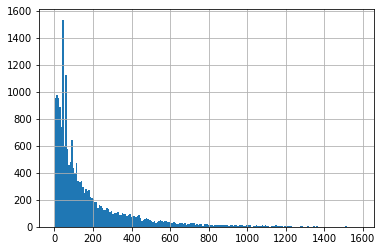

In [77]:
data['days_exposition'].hist(bins=200)

In [78]:
print(data['days_exposition'].mean())
print(data['days_exposition'].median())
data['days_exposition'].describe()

176.329835696371
93.0


count    19537.000000
mean       176.329836
std        215.169854
min          1.000000
25%         44.000000
50%         93.000000
75%        224.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

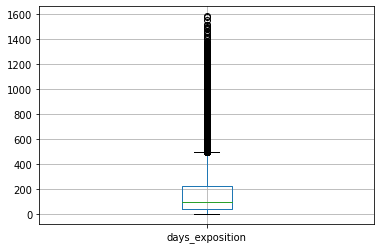

In [79]:
data.boxplot(column=['days_exposition'])

Мы изучили как быстро продовались квартиры. Объявления о продаже квартир в среднем висело 180 дней (с медианой 95 дней). Быстрыми продажами можно считать продажи квартир объявления о которых висело менее 45 дней (находящиеся в первой четверти выборки, в 1-квартили). Необычайно долгими продажами можно считать продажи квартир более 510 дней (примерно 4.3 года) (находящиеся в зоне более чем Q3 + 1,5 межквартильного размаха).

<AxesSubplot:>

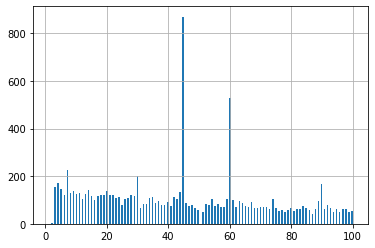

In [80]:
days_exposition_100 = data[data['days_exposition'] <= 100]
days_exposition_100['days_exposition'].hist(bins=200)

Очень инересно - пики на 45 и 60 дни и провал на 50 день (вообще отсутствуют данные). Я никогда не продовала и не покупала квартиры и затрудняюсь объяснить эти пики.... Если подскажите, буду очень благодарна. Возможно это связано с особенностями сайта где выставлялись эти квартиры... Может быть сброс цены в эти дни происходит? Может быть какие-нибудь условия по кредитам в эти дни? Может быть объявления в эти дни повышаются в рейтенге и их видят большее количество людей? В целом - затрудняюсь ответить на этот вопрос...

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

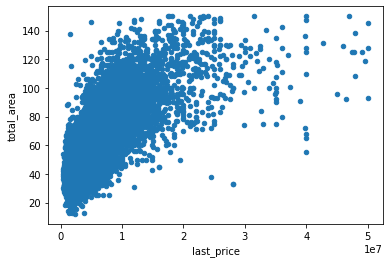

In [81]:
data.plot(x='last_price', y='total_area', kind='scatter')

In [82]:
print(data['last_price'].corr(data['total_area']))

0.7203513158070541


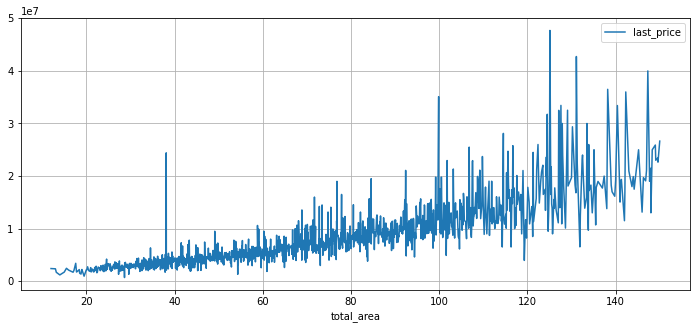

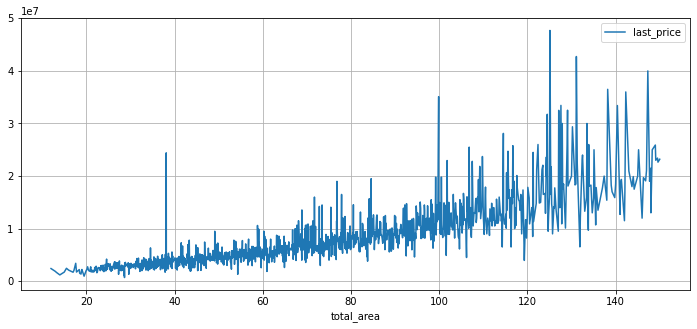

In [83]:
total_price_pivot = (data.pivot_table(index='total_area', values='last_price', aggfunc='mean').sort_values(by='total_area')
                                          .plot(grid=True, figsize=(12, 5)))
total_price_pivot_m = (data.pivot_table(index='total_area', values='last_price', aggfunc='median').sort_values(by='total_area')
                                          .plot(grid=True, figsize=(12, 5)))

Мы изучили зависит ли цена от общей площади. Да, цена зависит от общей площади, эту связь можно описать положительной линейной функцией, сила этой связи 0,72 (коэффициент корреляции)

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

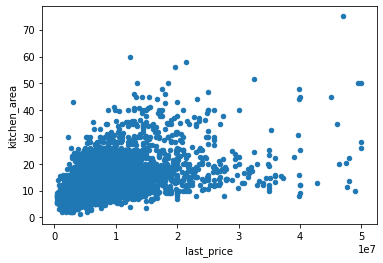

In [84]:
data.plot(x='last_price', y='kitchen_area', kind='scatter')

In [85]:
print(data['last_price'].corr(data['kitchen_area']))

0.5759966824031396


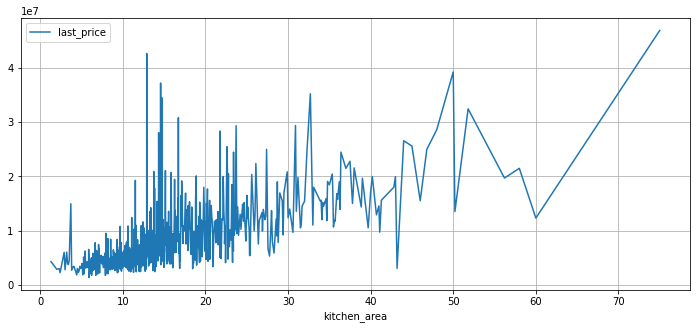

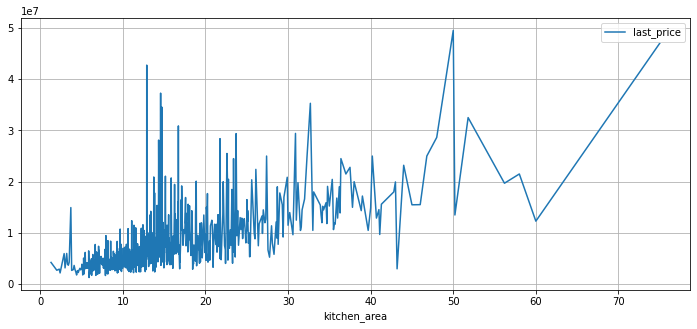

In [86]:
kitchen_price_pivot = (data.pivot_table(index='kitchen_area', values='last_price', aggfunc='mean').sort_values(by='kitchen_area')
                                          .plot(grid=True, figsize=(12, 5)))
kitchen_price_pivot_m = (data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').sort_values(by='kitchen_area')
                                          .plot(grid=True, figsize=(12, 5)))

Мы обнаружили, что цена квартиры так же положительно и линейно связана с площадью кухни. Но эта связь слабее (коэффициент корреляции 0,58), чем связь между ценой и общей площадью.

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

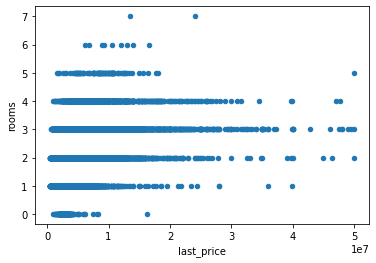

In [87]:
data.plot(x='last_price', y='rooms', kind='scatter')

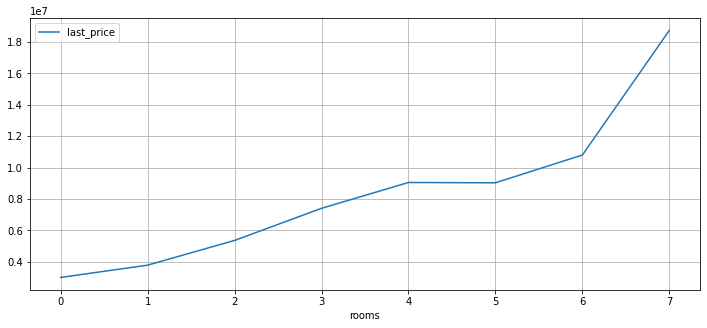

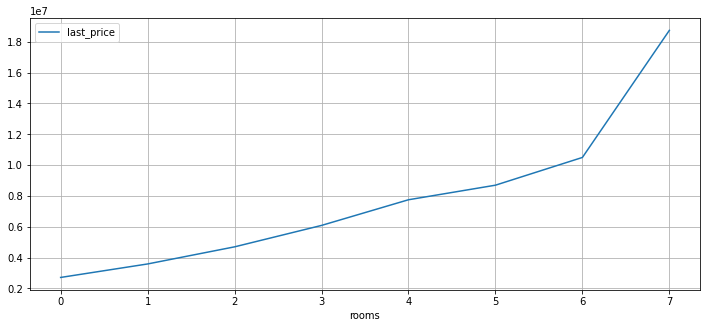

In [88]:
rooms_price_pivot = (data.pivot_table(index='rooms', values='last_price', aggfunc='mean').sort_values(by='rooms')
                                          .plot(grid=True, figsize=(12, 5)))
rooms_price_pivot_m = (data.pivot_table(index='rooms', values='last_price', aggfunc='median').sort_values(by='rooms')
                                          .plot(grid=True, figsize=(12, 5)))

Связь между ценой и количеством комнат тоже есть (но она не линейная).

In [89]:
data['tip_floor_int'] = data['tip_floor'].replace('первый', 1)
data['tip_floor_int'] = data['tip_floor_int'].replace('другой', 3)
data['tip_floor_int'] = data['tip_floor_int'].replace('последний', 2)
print(data['tip_floor_int'].value_counts())

3.0    16456
2.0     3077
1.0     2818
Name: tip_floor_int, dtype: int64


Мы создали новый столбец для типа этажа 'tip_floor_int' где вместо слов "первый", "последний", "другой", стоят цифры. Это необходимо для дальнейших расчетов.

<AxesSubplot:xlabel='last_price', ylabel='tip_floor_int'>

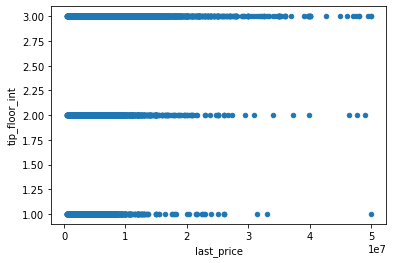

In [90]:
data.plot(x='last_price', y='tip_floor_int', kind='scatter')

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


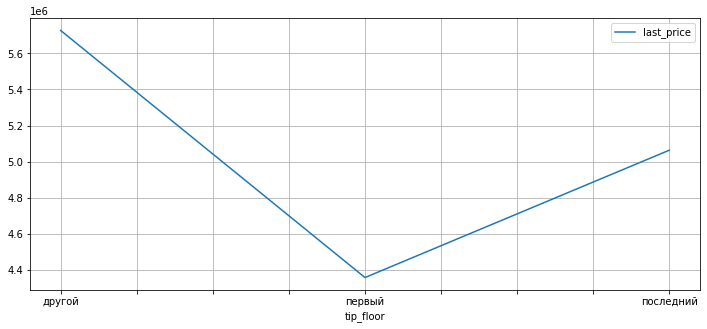

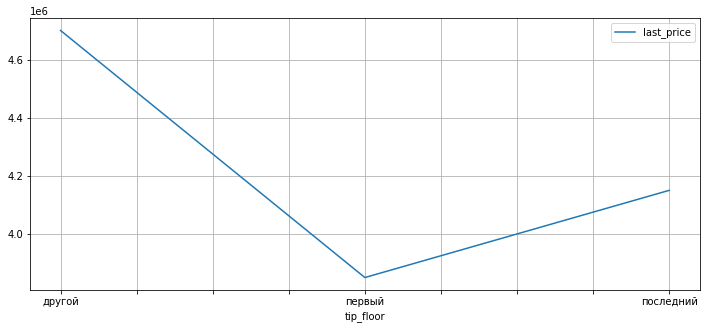

In [91]:
floor_price_pivot = (data.pivot_table(index='tip_floor', values='last_price', aggfunc='mean').sort_values(by='tip_floor')
                                          .plot(grid=True, figsize=(12, 5)))
floor_price_pivot_m = (data.pivot_table(index='tip_floor', values='last_price', aggfunc='median').sort_values(by='tip_floor')
                                          .plot(grid=True, figsize=(12, 5)))
print(floor_price_pivot)
print(floor_price_pivot_m)

Мы не обнаружили линейной связи между ценой квартиры и типом этажа (первый, последний, другой).Однако при составлении сводных таблиц, видно, что квартиры на первом этаже в среднем стоят меньше, чем на последнем и других (это прослеживается, как по среднему так и по медианному значению). На последнем этаже стоимость немного ниже чем на других.

<AxesSubplot:xlabel='last_price', ylabel='day_week_exp'>

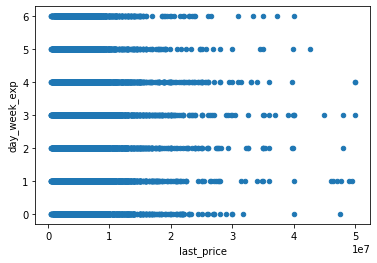

In [92]:
data.plot(x='last_price', y='day_week_exp', kind='scatter')

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


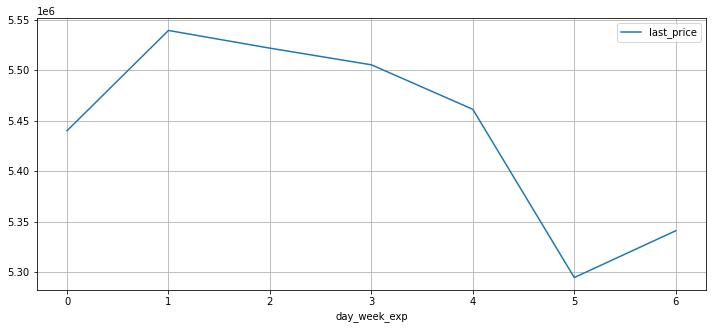

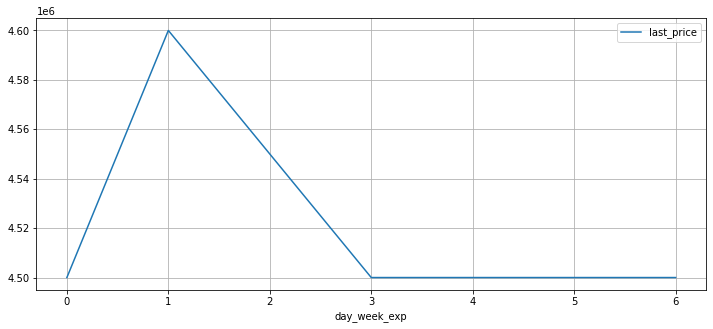

In [93]:
day_price_pivot = (data.pivot_table(index='day_week_exp', values='last_price', aggfunc='mean').sort_values(by='day_week_exp')
                                          .plot(grid=True, figsize=(12, 5)))
day_price_pivot_m = (data.pivot_table(index='day_week_exp', values='last_price', aggfunc='median').sort_values(by='day_week_exp')
                                          .plot(grid=True, figsize=(12, 5)))
print(day_price_pivot)
print(day_price_pivot_m)

Во вторник и среду квартиры продаются дороже всего. Так же наблюдается небольшое снижение цены квартир на выходных - но это прослеживается только по средним данным, по медианным не прослеживается. И не известно - достоверны ли эти изменения.

<AxesSubplot:xlabel='last_price', ylabel='month_exp'>

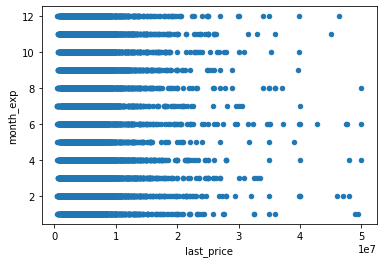

In [94]:
data.plot(x='last_price', y='month_exp', kind='scatter')

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


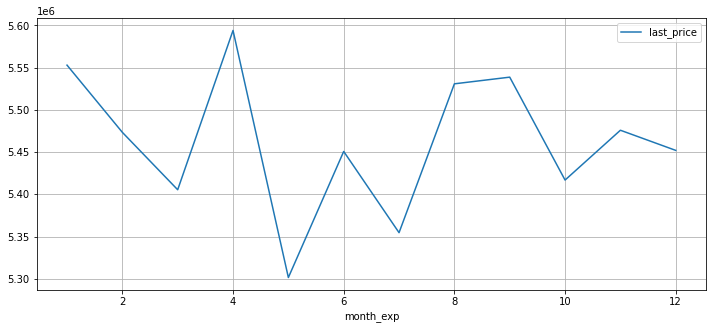

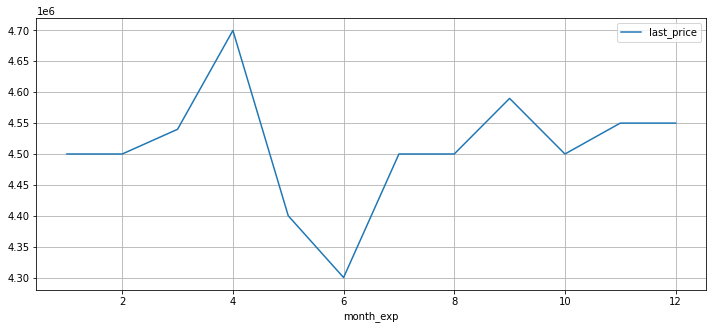

In [95]:
month_price_pivot = (data.pivot_table(index='month_exp', values='last_price', aggfunc='mean').sort_values(by='month_exp')
                                          .plot(grid=True, figsize=(12, 5)))
month_price_pivot_m = (data.pivot_table(index='month_exp', values='last_price', aggfunc='median').sort_values(by='month_exp')
                                          .plot(grid=True, figsize=(12, 5)))
print(month_price_pivot)
print(month_price_pivot_m)

Наблюдается небольшое снижение цены с мая по август. Так же наблюдается повышение цен в апреле. Но не известно - значимы ли эти изменения.

<AxesSubplot:xlabel='last_price', ylabel='year_exp'>

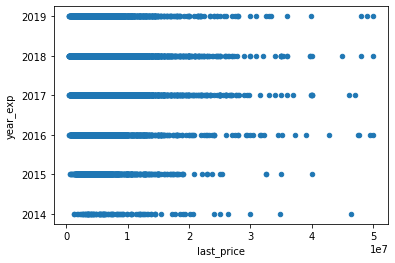

In [96]:
data.plot(x='last_price', y='year_exp', kind='scatter')

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


2018    8174
2017    7750
2019    2737
2016    2600
2015    1054
2014     113
Name: year_exp, dtype: int64

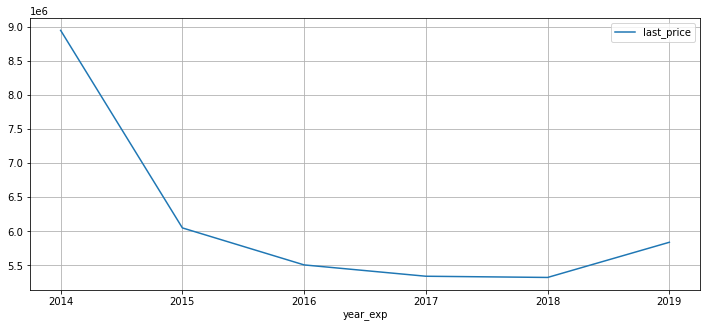

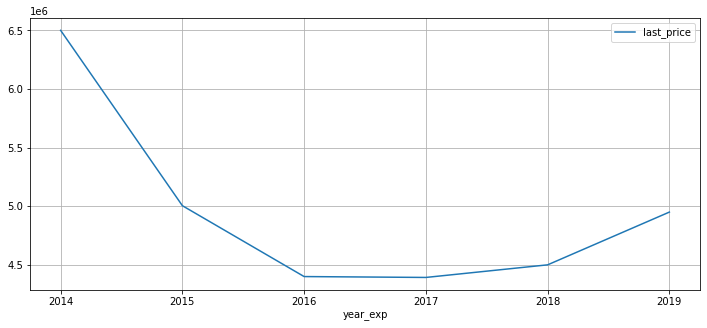

In [97]:
year_price_pivot = (data.pivot_table(index='year_exp', values='last_price', aggfunc='mean').sort_values(by='year_exp')
                                          .plot(grid=True, figsize=(12, 5)))
year_price_pivot_m = (data.pivot_table(index='year_exp', values='last_price', aggfunc='median').sort_values(by='year_exp')
                                          .plot(grid=True, figsize=(12, 5)))
print(year_price_pivot)
print(year_price_pivot_m)
data['year_exp'].value_counts()


Средняя цена на квартиры была выше в 2014 и 2015 гг. Наиболее дорогие квартиры были проданы в 2014 г. Хотя количество продаж в 2014-2015 гг. году было наименьшее.

In [98]:
data['locality_name'].value_counts().sort_values(ascending=False).head(10)

Санкт-Петербург      14649
поселок Мурино         581
деревня Кудрово        468
поселок Шушары         436
Всеволожск             390
Пушкин                 344
Колпино                332
поселок Парголово      318
Гатчина                298
Выборг                 232
Name: locality_name, dtype: int64

In [99]:
locality_max_price = data.query('locality_name == "Санкт-Петербург" or locality_name == "поселок Мурино" or locality_name == "деревня Кудрово" or locality_name == "поселок Шушары" or locality_name == "Всеволожск" or locality_name == "Пушкин" or locality_name == "Колпино" or locality_name == "поселок Парголово" or locality_name == "Гатчина" or locality_name == "Выборг"')
print(locality_max_price.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18048 entries, 0 to 22426
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18048 non-null  int64         
 1   last_price            18048 non-null  float64       
 2   total_area            18048 non-null  float64       
 3   first_day_exposition  18048 non-null  datetime64[ns]
 4   rooms                 18048 non-null  int64         
 5   ceiling_height        11048 non-null  float64       
 6   floors_total          17975 non-null  float64       
 7   living_area           16691 non-null  float64       
 8   floor                 18048 non-null  float64       
 9   is_apartment          18048 non-null  bool          
 10  studio                18048 non-null  bool          
 11  open_plan             18048 non-null  bool          
 12  kitchen_area          16358 non-null  float64       
 13  balcony         

                     price_m_squ
locality_name                   
Выборг              58179.594828
Всеволожск          68605.837641
Гатчина             68852.341409
Колпино             75530.182530
поселок Шушары      78695.169839
поселок Мурино      85863.108176
поселок Парголово   90696.558176
деревня Кудрово     95371.882991
Пушкин             102022.363517
Санкт-Петербург    111016.567463


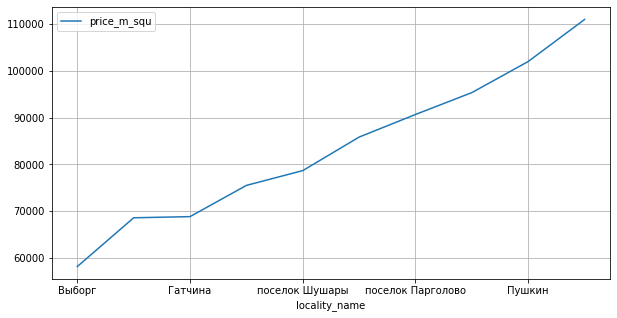

In [100]:
locality_max_price1 = locality_max_price.pivot_table(index='locality_name', values='price_m_squ', aggfunc='mean')
locality_max_price1.sort_values(by='price_m_squ').plot(grid=True, figsize=(10, 5))
print(locality_max_price1.sort_values(by='price_m_squ'))

Санкт-Петербург и Пушкин - населенные пункты с самой высокой ценой квадратного метра - более 100000 руб. Среди этих 10 населенных пунктов наименьшая цена квадратного метра в г.Выборг, менее 60000 руб.

<AxesSubplot:xlabel='cityCenter_km', ylabel='last_price'>

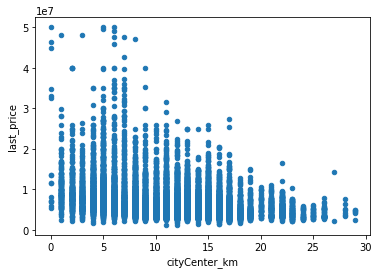

In [101]:
locality_sanct_peter = data.query('locality_name == "Санкт-Петербург"')
locality_sanct_peter.plot(x='cityCenter_km', y='last_price', kind='scatter')

In [102]:
print(locality_sanct_peter['cityCenter_km'].corr(locality_sanct_peter['last_price']))
print(locality_sanct_peter['cityCenter_km'].corr(locality_sanct_peter['price_m_squ']))

-0.3760514976213858
-0.3470523210903794


                 price_m_squ
cityCenter_km               
1.0            147696.392109
2.0            140546.499683
3.0            118803.781655
4.0            127281.354838
5.0            135609.223105
6.0            137546.999016
7.0            136514.448343
8.0            122356.579440
9.0            112693.579843
10.0           112182.561939
11.0           108062.536405
12.0           107382.023310
13.0           108016.587648
14.0           104043.944185
15.0           103762.819199
16.0           100149.867107
17.0            96584.549024
18.0            96372.773110
19.0            98059.191613
20.0           103036.466170
21.0            94099.375652
22.0            91152.105051
23.0            92063.679639
24.0            85736.904615
25.0            90956.626000
26.0            89562.556304
27.0           132115.710000
28.0            81161.914286
29.0            72953.365000


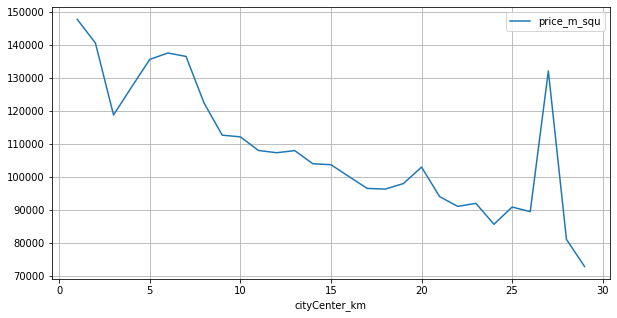

In [103]:
sanct_peter_km_city = locality_sanct_peter[locality_sanct_peter['cityCenter_km'] != 0]
sanct_peter_km_city = sanct_peter_km_city.dropna(subset=['cityCenter_km', 'last_price'])
sanct_peter_km_city
#sanct_peter_km_city['price_km'] = (sanct_peter_km_city['last_price'])/(sanct_peter_km_city['cityCenter_km'])

sanct_peter_km_city_pivot = sanct_peter_km_city.pivot_table(index='cityCenter_km', values='price_m_squ', aggfunc='mean')
sanct_peter_km_city_pivot.sort_values(by='cityCenter_km').plot(grid=True, figsize=(10, 5))
print(sanct_peter_km_city_pivot.sort_values(by='cityCenter_km'))


Мы проанализировали как стоимость объектов зависит от расстояния до центра города. Мы построили графики зависимости стоимости квадратного метра от расстояния до центра Санкт-Петербурга. Чем дальше от центра - тем дешевле средняя стоимость километра. Нами выявлена отрицательная линейная связь между стоимостью квартиры и расстоянием до центра Санкт-Петербурга (сила связи почти -0.38), а также между стоимостью квадратного метра и расстоянием до центра Санкт-Петербурга (сила связи почти -0.35)

### Напишите общий вывод

Очень дорогие квартиры -  это квартиры большой площади... Основная масса квартир продается по цене от 1000000 до 8000000 руб.

Мы изучили как быстро продовались квартиры. Объявления о продаже квартир в среднем висело 180 дней (с медианой 95 дней). Быстрыми продажами можно считать продажи квартир объявления о которых висело менее 45 дней Необычайно долгими - продажи квартир более 510 дней (примерно 4.3 года) 

Цена зависит от общей площади, связь достаточно сильная (0,72). Чем выше общая площадь, тем выше цена квартиры.

Цена квартиры так же положительно и линейно связана с площадью кухни. Но эта связь слабее 
(коэффициент корреляции 0,58), чем связь между ценой и общей площадью.

Квартиры на первом и последнем этажах в среднем стоят меньше, чем на других. На первом дешевле всего.

Мы обнаружили, что во вторник и среду цена на квартиры выше, а на выходных ниже. Но следует проверить статистическую значимость этих изменений.

В апреле наблюдается повышение цен на квартиры, но в летние месяцы снижение. Так же следует проверить значимость этих флуктуаций.

Наиболее дорогие квартиры были проданы в 2014 г. Хотя количество продаж в 2014-2015 гг. было наименьшее.

Санкт-Петербург и Пушкин - населенные пункты с самой высокой ценой квадратного метра - более 100000 руб. 
Среди 10 населенных пунктов (Санкт-Петербург, Пушкин, деревня Кудрово, поселок Парголово, поселок Мурино, поселок Шушары, Колпино, Гатчина, Всеволжск, Выборг) наименьшая цена квадратного метра в г.Выборг, менее 60000 руб.

Нами выявлена отрицательная линейная связь между стоимостью квартиры и расстоянием до центра Санкт-Петербурга (сила связи почти -0.38) и стоимостью квадратного метра и расстоянием до центра Санкт-Петербурга (сила связи почти -0,35). Чем дальше от центра в Санкт-Петербурге - тем дешевле средняя стоимость квадратного метра.